# Testing the Spectral Initialization

I saw that ratings were initialized with a random uniform distribution, which I understand is borrowed from deep learning practice, but I thought in this case we might be able to do a little better. Since the Ekhart-Young theorem gives a closed-form solution to low-rank matrix factorization without intercepts, my idea was to use the SVD to initialize the factors as if the intercepts were all zero, and then to perform gradient optimization. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scoring.matrix_factorization.matrix_factorization import MatrixFactorization
from scoring.process_data import preprocess_data

In [2]:
ratings_df = pd.read_csv("ratings-00009.tsv", sep='\t')
preprocessed_ratings_df = preprocess_data(ratings=ratings_df, notes=None, noteStatusHistory=None, ratingsOnly=True)[1]

In [3]:
preprocessed_ratings_df_sample = pd.read_csv("ratings-00009-preprocessed.tsv", sep='\t')    # in case I saved a preprocessed copy

In [ ]:
all_spec_fitNoteParams, all_spec_fitRaterParams, all_spec_globalIntercept, all_spec_train_loss, all_spec_loss, all_spec_validate_loss = [], [], [], [], [], []
all_unif_fitNoteParams, all_unif_fitRaterParams, all_unif_globalIntercept, all_unif_train_loss, all_unif_loss, all_unif_validate_loss = [], [], [], [], [], []
for _ in range(50):
    preprocessed_ratings_df_sample = preprocessed_ratings_df.sample(n=10000, replace=False)
    test_MatrixFactorization = MatrixFactorization()
    fitNoteParams, fitRaterParams, globalIntercept, train_loss, loss, validate_loss = test_MatrixFactorization.run_mf(ratings=preprocessed_ratings_df_sample, useSpectralInit=True, validatePercent=0.30)
    all_spec_fitNoteParams.append(fitNoteParams); all_spec_fitRaterParams.append(fitRaterParams); all_spec_globalIntercept.append(globalIntercept); all_spec_train_loss.append(train_loss); all_spec_loss.append(loss); all_spec_validate_loss.append(validate_loss)
    test_MatrixFactorization = MatrixFactorization()
    fitNoteParams, fitRaterParams, globalIntercept, train_loss, loss, validate_loss = test_MatrixFactorization.run_mf(ratings=preprocessed_ratings_df_sample, useSpectralInit=False, validatePercent=0.30)
    all_unif_fitNoteParams.append(fitNoteParams); all_unif_fitRaterParams.append(fitRaterParams); all_unif_globalIntercept.append(globalIntercept); all_unif_train_loss.append(train_loss); all_unif_loss.append(loss); all_unif_validate_loss.append(validate_loss)

In [ ]:
all_spec_fitNoteParams_30k, all_spec_fitRaterParams_30k, all_spec_globalIntercept_30k, all_spec_train_loss_30k, all_spec_loss_30k, all_spec_validate_loss_30k = [], [], [], [], [], []
all_unif_fitNoteParams_30k, all_unif_fitRaterParams_30k, all_unif_globalIntercept_30k, all_unif_train_loss_30k, all_unif_loss_30k, all_unif_validate_loss_30k = [], [], [], [], [], []
for _ in range(10):
    preprocessed_ratings_df_sample = preprocessed_ratings_df.sample(n=30000, replace=False)
    test_MatrixFactorization = MatrixFactorization()
    fitNoteParams, fitRaterParams, globalIntercept, train_loss, loss, validate_loss = test_MatrixFactorization.run_mf(ratings=preprocessed_ratings_df_sample, useSpectralInit=True, validatePercent=0.30)
    all_spec_fitNoteParams_30k.append(fitNoteParams); all_spec_fitRaterParams_30k.append(fitRaterParams); all_spec_globalIntercept_30k.append(globalIntercept); all_spec_train_loss_30k.append(train_loss); all_spec_loss_30k.append(loss); all_spec_validate_loss_30k.append(validate_loss)
    test_MatrixFactorization = MatrixFactorization()
    fitNoteParams, fitRaterParams, globalIntercept, train_loss, loss, validate_loss = test_MatrixFactorization.run_mf(ratings=preprocessed_ratings_df_sample, useSpectralInit=False, validatePercent=0.30)
    all_unif_fitNoteParams_30k.append(fitNoteParams); all_unif_fitRaterParams_30k.append(fitRaterParams); all_unif_globalIntercept_30k.append(globalIntercept); all_unif_train_loss_30k.append(train_loss); all_unif_loss_30k.append(loss); all_unif_validate_loss_30k.append(validate_loss)

In [ ]:
all_spec_fitNoteParams_dense, all_spec_fitRaterParams_dense, all_spec_globalIntercept_dense, all_spec_train_loss_dense, all_spec_loss_dense, all_spec_validate_loss_dense = [], [], [], [], [], []
all_unif_fitNoteParams_dense, all_unif_fitRaterParams_dense, all_unif_globalIntercept_dense, all_unif_train_loss_dense, all_unif_loss_dense, all_unif_validate_loss_dense = [], [], [], [], [], []
for _ in range(50):
    all_noteIds = preprocessed_ratings_df["noteId"].unique()
    all_raterIds = preprocessed_ratings_df["raterParticipantId"].unique()
    notes_sample = np.random.choice(all_noteIds, size=10000, replace=False)
    raters_sample = np.random.choice(all_raterIds, size=10000, replace=False)
    preprocessed_ratings_df_sample_dense = preprocessed_ratings_df[preprocessed_ratings_df["noteId"].isin(notes_sample) & preprocessed_ratings_df["raterParticipantId"].isin(raters_sample)]

    test_MatrixFactorization = MatrixFactorization()
    fitNoteParams, fitRaterParams, globalIntercept, train_loss, loss, validate_loss = test_MatrixFactorization.run_mf(ratings=preprocessed_ratings_df_sample_dense, useSpectralInit=True, validatePercent=0.30)
    all_spec_fitNoteParams_dense.append(fitNoteParams); all_spec_fitRaterParams_dense.append(fitRaterParams); all_spec_globalIntercept_dense.append(globalIntercept); all_spec_train_loss_dense.append(train_loss); all_spec_loss_dense.append(loss); all_spec_validate_loss_dense.append(validate_loss)
    test_MatrixFactorization = MatrixFactorization()
    fitNoteParams, fitRaterParams, globalIntercept, train_loss, loss, validate_loss = test_MatrixFactorization.run_mf(ratings=preprocessed_ratings_df_sample_dense, useSpectralInit=False, validatePercent=0.30)
    all_unif_fitNoteParams_dense.append(fitNoteParams); all_unif_fitRaterParams_dense.append(fitRaterParams); all_unif_globalIntercept_dense.append(globalIntercept); all_unif_train_loss_dense.append(train_loss); all_unif_loss_dense.append(loss); all_unif_validate_loss_dense.append(validate_loss)

In [ ]:
all_spec_fitNoteParams_30k_dense, all_spec_fitRaterParams_30k_dense, all_spec_globalIntercept_30k_dense, all_spec_train_loss_30k_dense, all_spec_loss_30k_dense, all_spec_validate_loss_30k_dense = [], [], [], [], [], []
all_unif_fitNoteParams_30k_dense, all_unif_fitRaterParams_30k_dense, all_unif_globalIntercept_30k_dense, all_unif_train_loss_30k_dense, all_unif_loss_30k_dense, all_unif_validate_loss_30k_dense = [], [], [], [], [], []
for _ in range(10):
    all_noteIds = preprocessed_ratings_df["noteId"].unique()
    all_raterIds = preprocessed_ratings_df["raterParticipantId"].unique()
    notes_sample = np.random.choice(all_noteIds, size=30000, replace=False)
    raters_sample = np.random.choice(all_raterIds, size=30000, replace=False)
    preprocessed_ratings_df_sample_dense = preprocessed_ratings_df[preprocessed_ratings_df["noteId"].isin(notes_sample) & preprocessed_ratings_df["raterParticipantId"].isin(raters_sample)]

    test_MatrixFactorization = MatrixFactorization()
    fitNoteParams, fitRaterParams, globalIntercept, train_loss, loss, validate_loss = test_MatrixFactorization.run_mf(ratings=preprocessed_ratings_df_sample_dense, useSpectralInit=True, validatePercent=0.30)
    all_spec_fitNoteParams_30k_dense.append(fitNoteParams); all_spec_fitRaterParams_30k_dense.append(fitRaterParams); all_spec_globalIntercept_30k_dense.append(globalIntercept); all_spec_train_loss_30k_dense.append(train_loss); all_spec_loss_30k_dense.append(loss); all_spec_validate_loss_30k_dense.append(validate_loss)
    test_MatrixFactorization = MatrixFactorization()
    fitNoteParams, fitRaterParams, globalIntercept, train_loss, loss, validate_loss = test_MatrixFactorization.run_mf(ratings=preprocessed_ratings_df_sample_dense, useSpectralInit=False, validatePercent=0.30)
    all_unif_fitNoteParams_30k_dense.append(fitNoteParams); all_unif_fitRaterParams_30k_dense.append(fitRaterParams); all_unif_globalIntercept_30k_dense.append(globalIntercept); all_unif_train_loss_30k_dense.append(train_loss); all_unif_loss_30k_dense.append(loss); all_unif_validate_loss_30k_dense.append(validate_loss)

## Results

I found the results a bit surprising! I expected the spectral initialization to guide the optimizer to a good part of the training loss landscape, so I thought the training and test loss would both improve a little. Instead I found that sometimes there was training loss improvement, but improvement was most visible in test loss. My best guess is that this may have something to do with the well-posedness of taking the SVD. Perhaps since the SVD is (speaking loosely) known to vary smoothly with the matrix entries, it guides to an optimum that's robust to changes in those entries, and thus better generalizing. I don't have any less hand-wavey way of explaining it, but if the reader does please let me know! If it turns out experimentally that the SVD is sufficiently robust to new matrix entries, the spectral initialization may also provide a way of making note ratings consistent between algorithm runs, while avoiding getting stuck in a less principled part of the landscape as initializing with the previous day's run might. 

I have not tested the spectral initialization when using `NormalizedLoss`, or against a uniform initialization using `NormalizedLoss`. I noticed that the default learning rate when using a special initiailization is different from when using the uniform, but I did not observe a difference when I tried using the smaller one in my small amount of testing.

Since I'm running this all on my laptop cpu, I was limited to testing on small samples of the full community notes data. I ran 50 tests using a sample of 10k, and 10 tests using a sample of 30k. Sampling from a sparse matrix is tricky, and I'm not sure how to best represent the full data. For the "sparse" samples selected below, I randomly sampled ratings (each a (rater, note, rating) tuple), which I found intuitive at first. But, especially for the 10k sample I became concerned with the number of rows and columns that only had one entry. So for the "dense" samples below, I sampled either 10k or 30k notes and 10k or 30k raters, and then selected all ratings from the dataset (which is itself 1/10 of all released data) where both the rater and note were in the sample. This led to a much denser (but still very sparse) ratings matrix. 

As a sanity check, I also took a look at the values of parameters returned by both initializations. Differences were present, but minimal. The reasons for those differences could be interesting to continue to ponder. The global intercept was an exception, which I write a bit more about at the bottom. 

Unfortunately SVD is expensive to compute, and also with default algorithms requires the formation of the full raters-by-notes matrix, which I noticed the sourcecode takes care to avoid. If you intentionally have avoided ever using SVD solely because of its polyomial time and space use, then consider this a fun test! But, while running the entire SVD every hour may be intractable, I think SVD's fast rank-one updating procedures could make its use practically feasible for community notes' purposes. Additionally, I'm not an expert but I believe there exist algorithms to get the top of the SVD without ever actually forming the full raters-by-notes matrix.

In testing, I caught a sneaky bug on line 245 of the pushed code. When changing what `self.mf_model.global_intercept` references entirely, as the code did previously, the optimizer loses track of it and will not update it during optimization. I believe updating `self.mf_model.global_intercept.data` instead should fix this. Even if you're not interested in the SVD stuff, I hope you'll make this quick fix, and maybe we can save the next developer a good amount of debugging pain :). 

C:\Users\iijof\AppData\Local\Temp\ipykernel_5220\1014462041.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


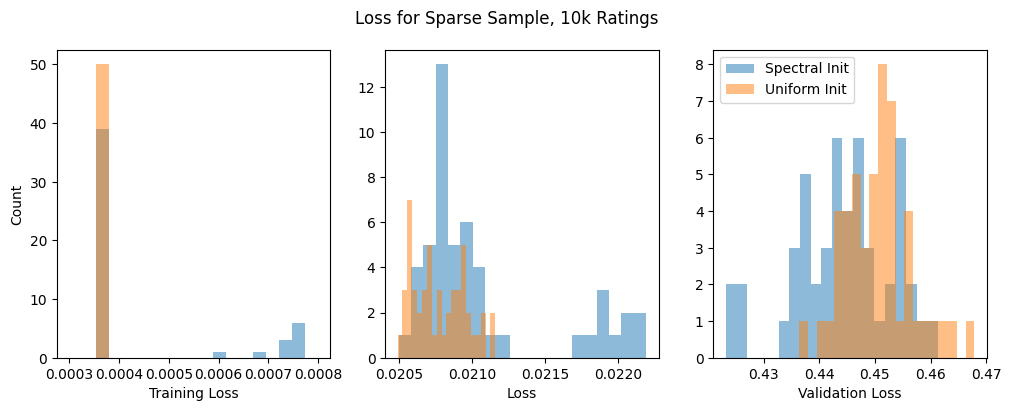

In [27]:
fig, ax = plt.subplots(1,3, figsize=(12,4))

x_min, x_max = 0.0003, 0.0008    # account for outliers in the uniform loss. no major difference on this graph when zooming in around 3.5e-4
bins = np.linspace(x_min, x_max, 20)
ax[0].hist(all_spec_train_loss, bins=bins, alpha=0.5)
ax[0].hist(all_unif_train_loss, bins=bins, alpha=0.5)
ax[0].set_xlabel("Training Loss")
ax[0].set_ylabel("Count")

ax[1].hist(all_spec_loss, bins=20, alpha=0.5)
ax[1].hist(all_unif_loss, bins=20, alpha=0.5)
ax[1].set_xlabel("Loss")

ax[2].hist(all_spec_validate_loss, bins=20, label="Spectral Init", alpha=0.5)
ax[2].hist(all_unif_validate_loss, bins=20, label="Uniform Init", alpha=0.5)
ax[2].set_xlabel("Validation Loss")
ax[2].legend()

fig.suptitle("Loss for Sparse Sample, 10k Ratings")
fig.show()

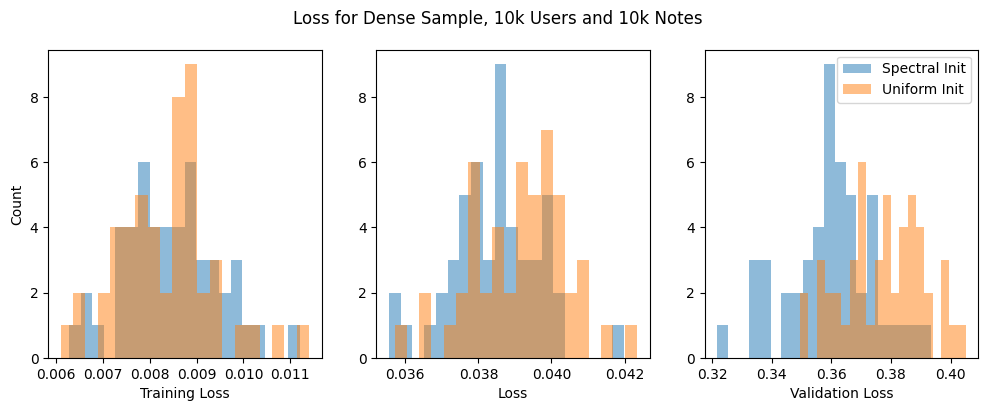

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

# Layered histogram for training loss
ax[0].hist(all_spec_train_loss_dense, bins=20, alpha=0.5)
ax[0].hist(all_unif_train_loss_dense, bins=20, alpha=0.5)
ax[0].set_xlabel("Training Loss")
ax[0].set_ylabel("Count")

# Layered histogram for loss
ax[1].hist(all_spec_loss_dense, bins=20, alpha=0.5)
ax[1].hist(all_unif_loss_dense, bins=20, alpha=0.5)
ax[1].set_xlabel("Loss")

# Layered histogram for validation loss
ax[2].hist(all_spec_validate_loss_dense, bins=20, alpha=0.5, label="Spectral Init")
ax[2].hist(all_unif_validate_loss_dense, bins=20, alpha=0.5, label="Uniform Init")
ax[2].set_xlabel("Validation Loss")
ax[2].legend()

fig.suptitle("Loss for Dense Sample, 10k Users and 10k Notes")
plt.show()

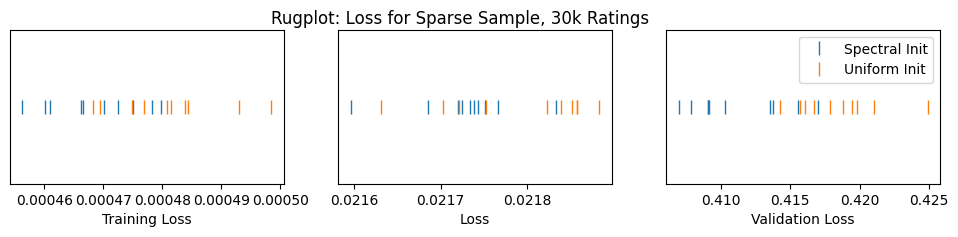

In [11]:
fig, ax = plt.subplots(1, 3, figsize=(12, 2))

for data in [all_spec_train_loss_30k, all_unif_train_loss_30k]:
    ax[0].plot(data, np.zeros_like(data) + 0.01, '|', markersize=10)
ax[0].set_xlabel("Training Loss")
ax[0].yaxis.set_visible(False)

for data in [all_spec_loss_30k, all_unif_loss_30k]:
    ax[1].plot(data, np.zeros_like(data) + 0.01, '|', markersize=10)
ax[1].set_xlabel("Loss")
ax[1].yaxis.set_visible(False)

for data, label in zip([all_spec_validate_loss_30k, all_unif_validate_loss_30k], ["Spectral Init", "Uniform Init"]):
    ax[2].plot(data, np.zeros_like(data) + 0.01, '|', markersize=10, label=label)
ax[2].set_xlabel("Validation Loss")
ax[2].legend()
ax[2].yaxis.set_visible(False)

fig.suptitle("Rugplot: Loss for Sparse Sample, 30k Ratings")
plt.show()

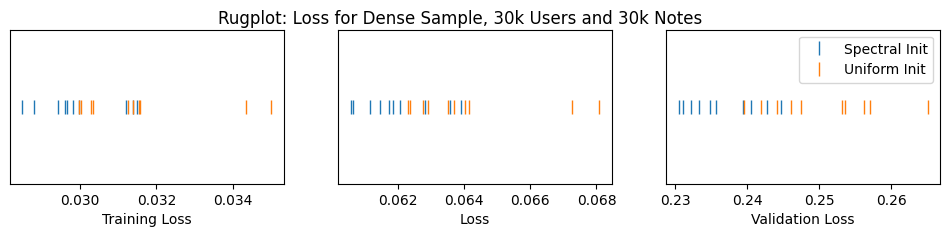

In [12]:
fig, ax = plt.subplots(1, 3, figsize=(12, 2))

for data in [all_spec_train_loss_30k_dense, all_unif_train_loss_30k_dense]:
    ax[0].plot(data, np.zeros_like(data) + 0.01, '|', markersize=10)
ax[0].set_xlabel("Training Loss")
ax[0].yaxis.set_visible(False)

for data in [all_spec_loss_30k_dense, all_unif_loss_30k_dense]:
    ax[1].plot(data, np.zeros_like(data) + 0.01, '|', markersize=10)
ax[1].set_xlabel("Loss")
ax[1].yaxis.set_visible(False)

for data, label in zip([all_spec_validate_loss_30k_dense, all_unif_validate_loss_30k_dense], ["Spectral Init", "Uniform Init"]):
    ax[2].plot(data, np.zeros_like(data) + 0.01, '|', markersize=10, label=label)
ax[2].set_xlabel("Validation Loss")
ax[2].legend()
ax[2].yaxis.set_visible(False)

fig.suptitle("Rugplot: Loss for Dense Sample, 30k Users and 30k Notes")
plt.show()

C:\Users\iijof\AppData\Local\Temp\ipykernel_5220\4269532440.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


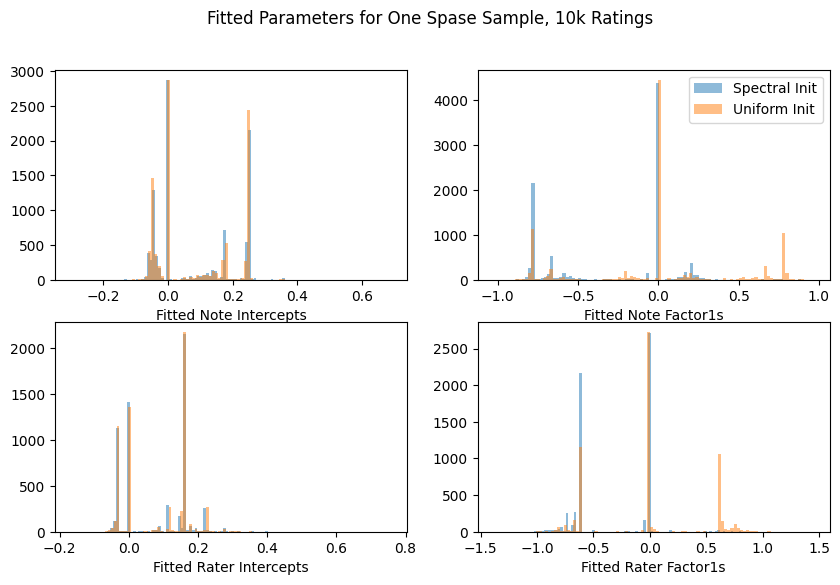

In [16]:
fig, ax = plt.subplots(2, 2, figsize=(10,6))

ax[0][0].hist(all_spec_fitNoteParams[0]["internalNoteIntercept"], bins=100, alpha=0.5)
ax[0][0].hist( all_unif_fitNoteParams[0]["internalNoteIntercept"], bins=100, alpha=0.5)
ax[0][0].set_xlabel("Fitted Note Intercepts")

ax[0][1].hist(all_spec_fitNoteParams[0]["internalNoteFactor1"], bins=100, alpha=0.5, label="Spectral Init")
ax[0][1].hist(all_unif_fitNoteParams[0]["internalNoteFactor1"], bins=100, alpha=0.5, label=["Uniform Init"])
ax[0][1].set_xlabel("Fitted Note Factor1s")
ax[0][1].legend()

ax[1][0].hist(all_spec_fitRaterParams[0]["internalRaterIntercept"], bins=100, alpha=0.5)
ax[1][0].hist(all_unif_fitRaterParams[0]["internalRaterIntercept"], bins=100, alpha=0.5)
ax[1][0].set_xlabel("Fitted Rater Intercepts")

ax[1][1].hist(all_spec_fitRaterParams[0]["internalRaterFactor1"], bins=100, alpha=0.5)
ax[1][1].hist(all_unif_fitRaterParams[0]["internalRaterFactor1"], bins=100, alpha=0.5)
ax[1][1].set_xlabel("Fitted Rater Factor1s")

fig.suptitle("Fitted Parameters for One Spase Sample, 10k Ratings")
fig.show()

C:\Users\iijof\AppData\Local\Temp\ipykernel_5220\1918245580.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0][1].legend()
C:\Users\iijof\AppData\Local\Temp\ipykernel_5220\1918245580.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


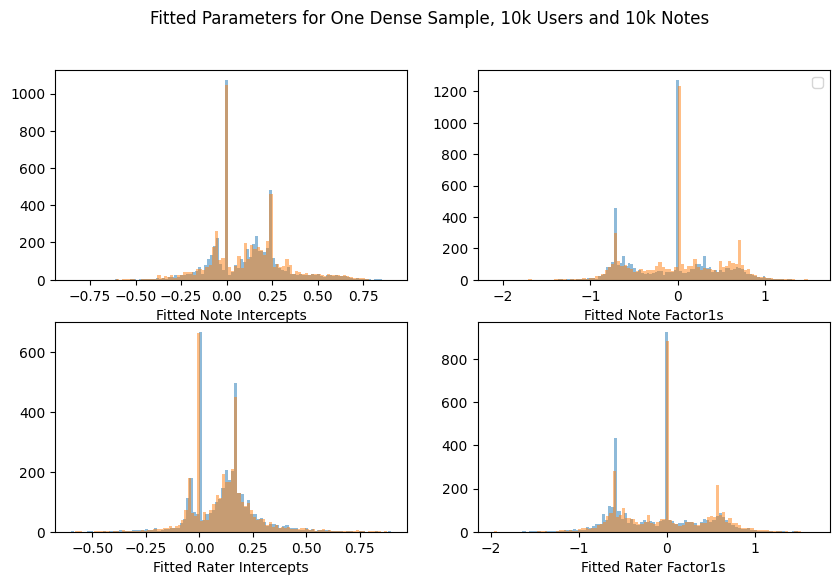

In [22]:
fig, ax = plt.subplots(2, 2, figsize=(10,6))

ax[0][0].hist(all_spec_fitNoteParams_dense[0]["internalNoteIntercept"], bins=100, alpha=0.5)
ax[0][0].hist(all_unif_fitNoteParams_dense[0]["internalNoteIntercept"], bins=100, alpha=0.5)
ax[0][0].set_xlabel("Fitted Note Intercepts")

ax[0][1].hist(all_spec_fitNoteParams_dense[0]["internalNoteFactor1"], bins=100, alpha=0.5)
ax[0][1].hist(all_unif_fitNoteParams_dense[0]["internalNoteFactor1"], bins=100, alpha=0.5)
ax[0][1].set_xlabel("Fitted Note Factor1s")
ax[0][1].legend()

ax[1][0].hist(all_spec_fitRaterParams_dense[0]["internalRaterIntercept"], bins=100, alpha=0.5)
ax[1][0].hist(all_unif_fitRaterParams_dense[0]["internalRaterIntercept"], bins=100, alpha=0.5)
ax[1][0].set_xlabel("Fitted Rater Intercepts")

ax[1][1].hist(all_spec_fitRaterParams_dense[0]["internalRaterFactor1"], bins=100, alpha=0.5)
ax[1][1].hist(all_unif_fitRaterParams_dense[0]["internalRaterFactor1"], bins=100, alpha=0.5)
ax[1][1].set_xlabel("Fitted Rater Factor1s")

fig.suptitle("Fitted Parameters for One Dense Sample, 10k Users and 10k Notes")
fig.show()

The spectral initialization generally gives a higher global intercept than the uniform initialization. When the line 245 bug was present and the global intercept got stuck around the average rating value, I observed that generalization was actually even better than when the global intercept was gradually learned. From breifly experimenting with different permanant global intercept choices, I believe that some, but not all of the improved generalization of the spectral initialization is due to this. It makes sense that a high global intercept helps to generalize because it's able to use every rating to fit. 

While I understand that the motivation of regularizing the intercepts more than factors to push weight off of the intercepts, I'm not sure why this would apply to the global intercept. I don't think I agree with the design choice to heavily regularize it, especially in light of finding that it's useful for generalization, but I'd love to know if there's a reason I haven't thought of. 

## Iterative Spectral Initialization

I also had the idea to run several iterations of optimization using the SVD. In the first, nan values in the data are filled with user and note means, but in subsequent rounds of optimization, the spectral initialization's SVD uses the data matrix where the nans are filled with the sum of the note and user's intercept, as learned in the previous round. Ultimately, I found that this had little impact and was sometimes even harmful. For the sparse samples, the parameters had almost no movement past the first round. For the dense samples, some did move around, but not in an obviously convergent way (at least in one dimension, I didn't check past that) and it did not lead to improvement in loss. This is still interesting though because it suggests that the low-loss optima found using spectral initialization aren't extremely unique and special. 

I left the code in since maybe it could be made to work with some further tweaks. One such idea that I haven't yet tested would be to add noise to the data within each round, and then take some kind of average of the parameters that each round finds. 

## Update: Low-Memory SVD!

Previously, SVD failed when attempting to run the algorithm with over a few million ratings. This is because it requires building the full notes x raters matrix, which either took up too much memory and crashed my notebook, or caused errors on the call to pandas' `pivot` on line 188. Luckily, the notes x raters matrix is extremely sparse (most raters have not rated most notes), and the scipy.sparse library is built for handling this, by storing the matrix in a format more similar to the three-column format in `modelData`. 

The updated code has a `saveMemory` parameter when calling `run_mf`, which will use scipy instead of pandas and numpy to do the linear algebra. It is off by default. When it's on, my laptop is able to do the SVD for any data size I gave it. It's still a bit slow for the several-million-rating samples, but I don't think it's that much slower than the gradient descent phase and expect it would be much faster, perhaps satisfactorily fast, on X's hardware. 

The disadvantage of using the sparse representation is that you have less control over filling in the missing values for the SVD. You must fill them all with the same value (e.g. the overall mean rating), and then subtract that value before SVD to create sparseness. On the other hand, I actually saw some loss *improvement* when using the sparse representation, which I can only imagine is due to this change in filling missing values. So I'm currently thinking about why that might be the case, as well as about other potentially beneficial normalization strategies. Overall, I'm a bit philosophically concerned that the missing value interpolation may make the algorithm give too much sway to raters or notes without many ratings. But, the filled values are still not included in the loss, which descreases, so again I don't know exactly how to think about it at this moment. 

I haven't had time to benchmark the time, space, or especially accuracy to be confident enough to put graphs here, but hope to have a chance soon! I also haven't taken the time to apply this to iterative spectral initialization, since that didn't work in the first place. 